# Análisis Exploratorio

El análisis exploratorio es útil para comprender nuestros datos, proporcionando información  para los modelos de modelos de machine learning de recomendaciones de usuarios.

1. **Cargar el Conjunto de Datos:**
   Importar el conjunto de datos en el entorno de trabajo.

2. **Explorar la Estructura del Conjunto de Datos:**
   Examinar las primeras filas, obtener información sobre tipos de datos, dimensiones y verificar la presencia de datos nulos.

3. **Estadísticas Descriptivas:**
   Calcular estadísticas descriptivas básicas, como promedios, medianas y desviaciones estándar, para entender la distribución de los datos.

4. **Visualizaciones:**
   Crear visualizaciones simples, como histogramas, boxplots o gráficos de barras, para explorar la distribución de las variables.


### Importación de Bibliotecas

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

## Análisis Exploratorio del CSV "steam_games"

#### Lectura del CSV "steam_games"

Importamos el conjunto de datos "steam_games" en el entorno de trabajo. 


In [106]:
steam_games = pd.read_csv('..\\Datsets\\CSV\\steam_games.csv')

#### Estructura del DataFrame

Para comprender la estructura del DataFrame "steam_games", exploramos la cantidad de filas, columnas y la presencia de datos nulos.

In [107]:
print(f'El dataframe de steam_games tiene {steam_games.shape[0]} filas')
print(f'El dataframe de steam_games tiene {steam_games.shape[1]} columnas')

El dataframe de steam_games tiene 32135 filas
El dataframe de steam_games tiene 9 columnas


Porcentaje de datos nulos por columna

In [108]:
porcentaje_nulos = round(steam_games.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

genres           0.433%
app_name         0.006%
tags             0.507%
specs            2.085%
price            4.285%
early_access       0.0%
id               0.006%
developer       10.132%
release_year     7.319%
dtype: object


Las columnas que presentan una mayor cantidad de datos nulos son "developer" y "release_year".

Datos duplicados

In [109]:
# Verificar la cantidad de datos duplicados
duplicados = steam_games.duplicated().sum()
print(f"Cantidad de datos duplicados en steam_games: {duplicados}")

Cantidad de datos duplicados en steam_games: 1


Tipo de datos

In [110]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = steam_games.dtypes
print("\nTipos de datos en steam_games:")
print(tipos_de_datos)


Tipos de datos en steam_games:
genres           object
app_name         object
tags             object
specs            object
price           float64
early_access    float64
id              float64
developer        object
release_year    float64
dtype: object


In [111]:
steam_games.head()

,genres,app_name,tags,specs,price,early_access,id,developer,release_year
0,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"['Free to Play', 'Strategy', 'Indie', 'RPG']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0.0,767400.0,彼岸领域,2017.0
4,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN


#### Estadística descriptiva

In [112]:
round(steam_games.drop(columns=['id','early_access'],axis=1).describe(),3)

,price,release_year
count,30758.000,29783.000
mean,8.898,2014.759
std,16.341,3.508
min,0.000,1970.000
25%,2.990,2014.000
50%,4.990,2016.000
75%,9.990,2017.000
max,995.000,2021.000


La columna de precio (`price`) tiene un rango de $995.  El promedio es de $8.897 con una desviación estándar de $16.341. Además, el 75% de los datos están por debajo de $9.99.

En cuanto a la columna del año de lanzamiento, se observa un rango de 42 años. El 25% de los juegos se lanzaron antes de 2014, el 50% antes de 2016 y el 75% antes de 2017. Además, se tienen datos hasta 2021, lo que sugiere que entre 2014 y 2017 se lanzaron muchos títulos.


### Histograma

Se presenta el histograma de la columna "price" del DataFrame. En la primera fila, se observan valores atípicos muy grandes. Para abordar este sesgo hacia la derecha y considerando que no hay valores negativos, se aplicará una transformación logarítmica.

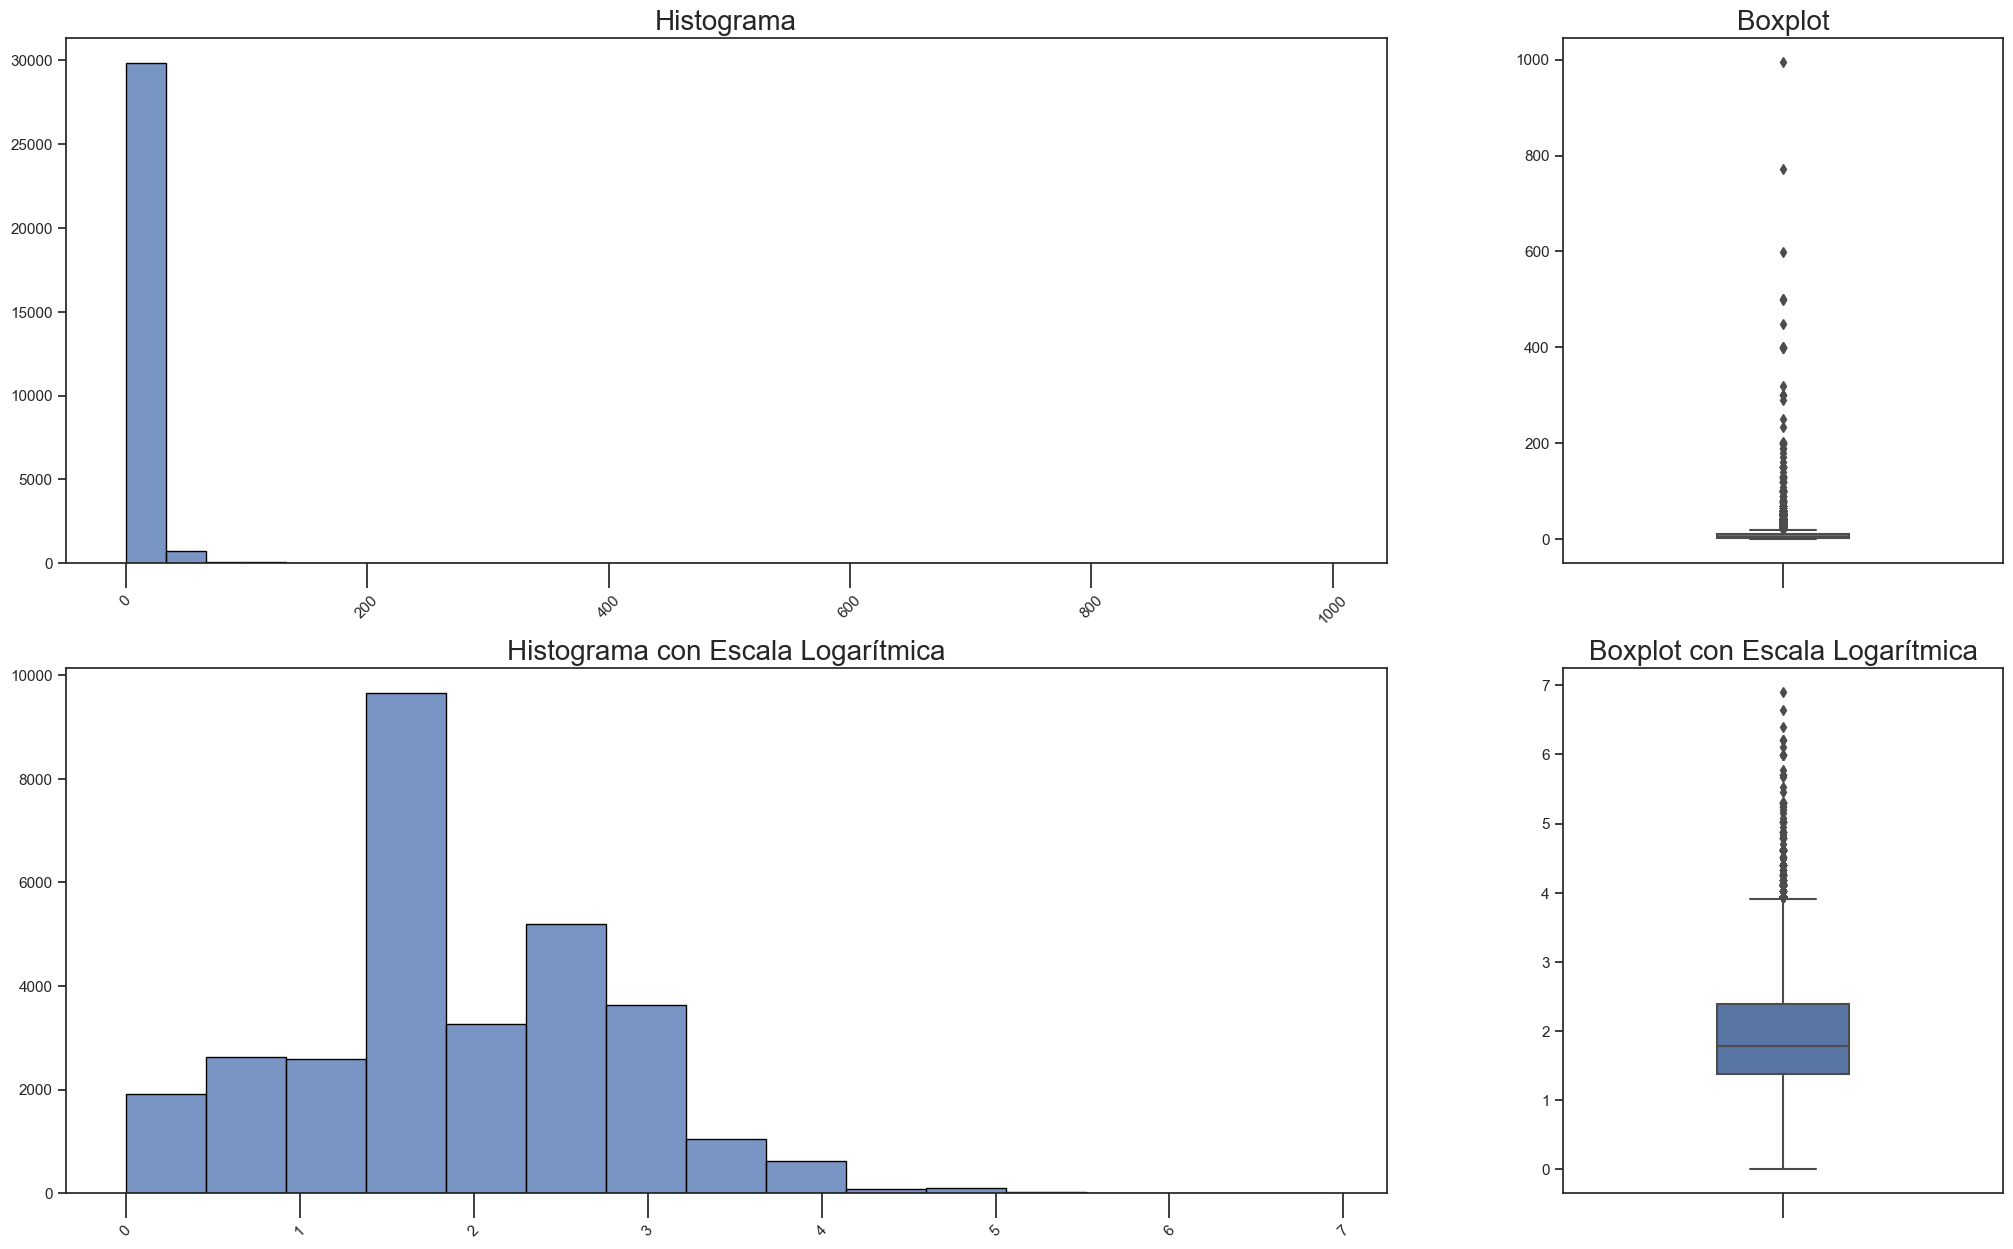

In [113]:
# Crear un lienzo con cuatro gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15), gridspec_kw={'width_ratios': [3, 1]})
sns.set_style("ticks")

# Histograma original
sns.histplot(steam_games['price'], bins=30, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Histograma',fontsize = 20)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# Boxplot original
sns.boxplot(y=steam_games['price'], ax=axes[0, 1], width=0.3)
axes[0, 1].set_title('Boxplot',fontsize = 20)
axes[0, 1].set_ylabel('')

# Histograma con escala logarítmica
sns.histplot(np.log1p(steam_games['price']), bins=15, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Histograma con Escala Logarítmica',fontsize = 20)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# Boxplot con escala logarítmica
sns.boxplot(y=np.log1p(steam_games['price']), ax=axes[1, 1], width=0.3)
axes[1, 1].set_title('Boxplot con Escala Logarítmica',fontsize = 20)
axes[1, 1].set_ylabel('')

# Añadir estilo a los ticks
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45,size=18)


Después de aplicar la transformación logarítmica, se observa una considerable reducción en el rango de los precios. Sin embargo, en el boxplot aún se pueden apreciar valores atípicos hacia arriba, indicando la presencia de algunos juegos con precios significativamente más altos que la mayoría.

### Gráfico de barras

Se presenta a continuación un gráfico de barras que compara la cantidad de juegos que cuentan con acceso anticipado y aquellos que no lo tienen. 

En el eje horizontal, encontramos dos barras distintas. La altura de cada barra indica el número de juegos correspondientes a cada categoría.

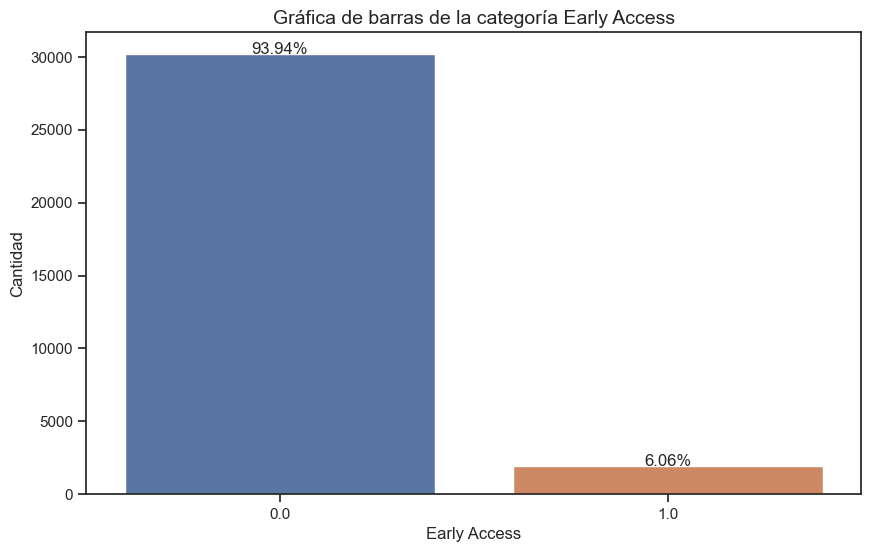

In [114]:
# Configurar el lienzo con un solo gráfico
sns.set(style="ticks")
plt.figure(figsize=(10, 6))

# Gráfica de barras para 'early_access'
sns.countplot(x='early_access', data=steam_games)
plt.title('Gráfica de barras de la categoría Early Access',fontsize = 14)
plt.xlabel('Early Access')
plt.ylabel('Cantidad')

# Agregar etiquetas con porcentaje
total_samples_early_access = len(steam_games['early_access'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.1,
                   f'{height / total_samples_early_access:.2%}',
                   ha="center")

# Mostrar la gráfica
plt.show()

93.9% de los juegos en el conjunto de datos no cuentan con acceso anticipado

En la siguiente visualización, se presenta una comparativa de la cantidad de juegos lanzados cada año. 
En el eje horizontal se encuentran los años, mientras que en el eje vertical se representa la cantidad de juegos lanzados. 

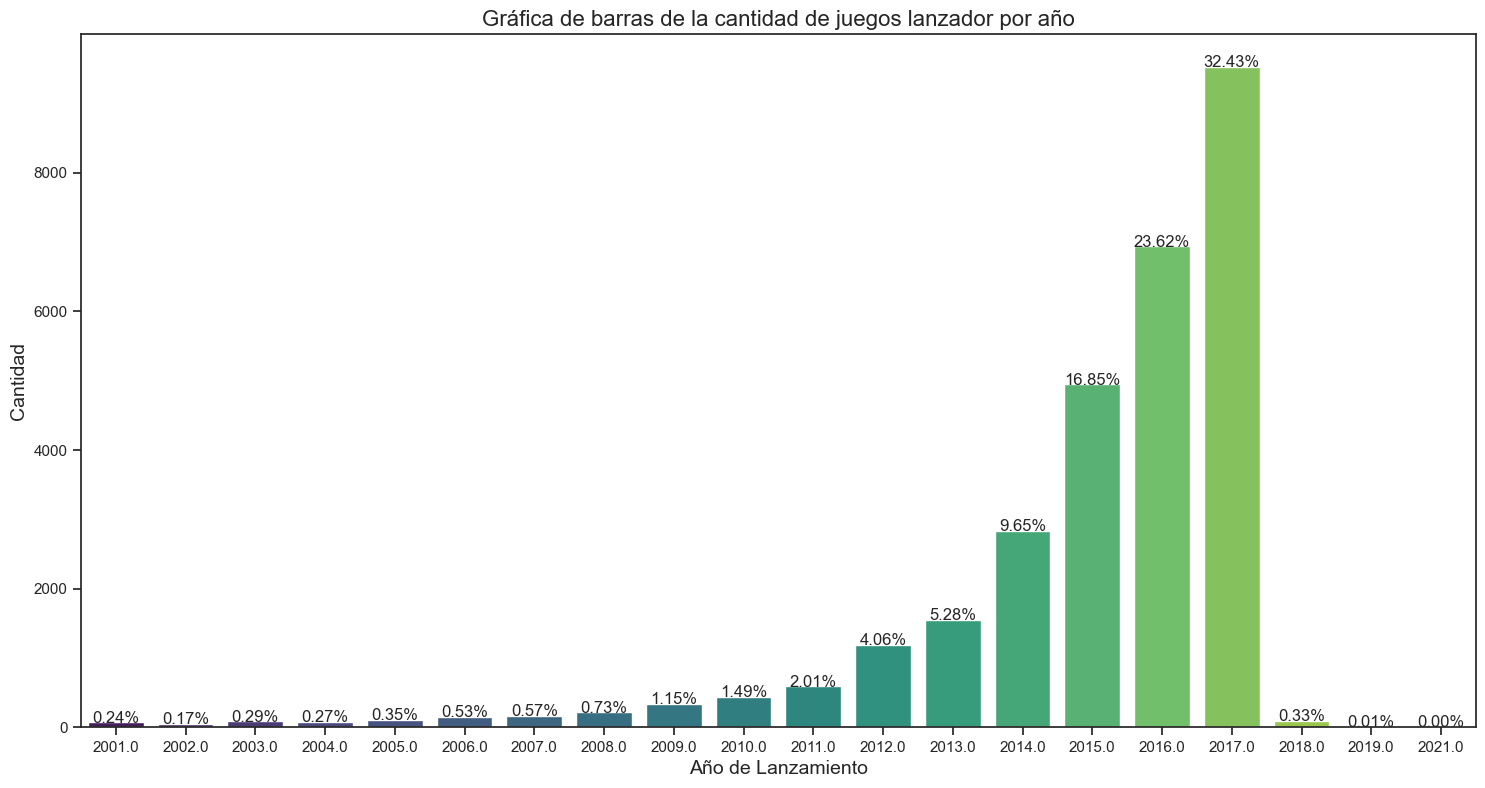

In [115]:

steam_games_filtered = steam_games[steam_games['release_year'] > 2000]

# Configurar el lienzo con un solo gráfico de barras
plt.figure(figsize=(18, 9))

# Gráfica de barras para 'release_year'
ax = sns.countplot(x='release_year', data=steam_games_filtered, palette='viridis')

# Añadir etiquetas con porcentaje
total_samples = len(steam_games_filtered['release_year'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height / total_samples:.2%}',
            ha="center")

plt.title('Gráfica de barras de la cantidad de juegos lanzador por año', fontsize = 16)
plt.xlabel('Año de Lanzamiento',fontsize = 14)
plt.ylabel('Cantidad',fontsize = 14)

# Mostrar la gráfica
plt.show()



Existe una tendencia positiva en la cantidad de juegos lanzados cada año. Lo que sugiere que la isndustria de los videojuegos ha ido en aumento en los ultimos años

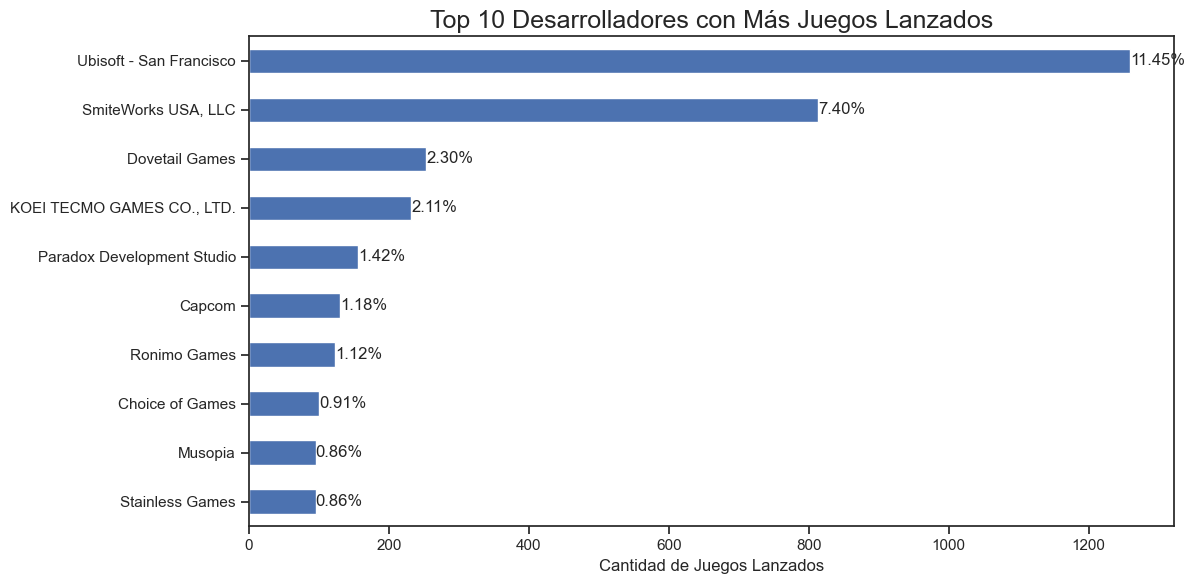

In [116]:
# Contar la cantidad de juegos por cada desarrollador
top_developers = steam_games['developer'].value_counts().head(10)

# Calcular porcentajes
percentages = (top_developers / len(steam_games['developer'].unique())) * 100

# Crear un gráfico de 
plt.figure(figsize=(12, 6))
ax = top_developers.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Desarrolladores con Más Juegos Lanzados',fontsize=18)
plt.xlabel('Cantidad de Juegos Lanzados')
plt.ylabel('')
plt.tight_layout()

# Agregar etiquetas con porcentajes
for i, (developer, percentage) in enumerate(zip(top_developers.index[::-1], percentages[::-1])):
    ax.text(top_developers[developer], i, f'{percentage:.2f}%', va='center')

plt.show()


El 29.61% de los videojuegos analizados son desarrollados por estas 10 principales desarrolladoras.

### Nube de palabras

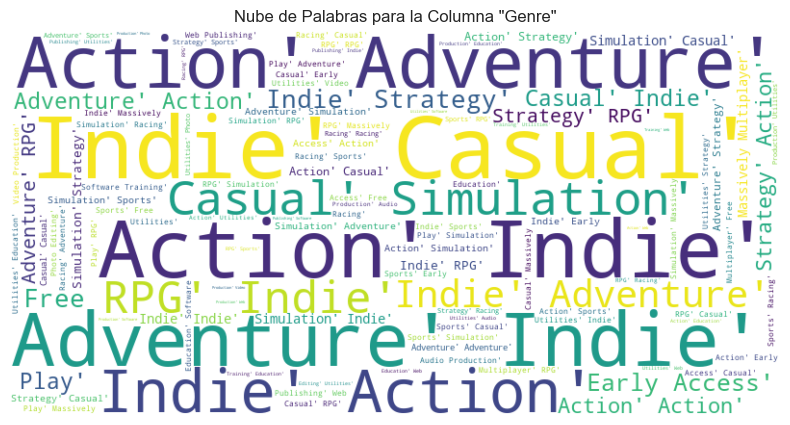

In [117]:
# Crear un string concatenando todos los valores de la columna 'genre'
genres_text = ' '.join(steam_games['genres'].dropna())

# Configurar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "Genre"')
plt.show()

Se observa que los términos más frecuentes destacados en la nube de palabras son: **acción**, **aventura**, **indie**, **casual** y **RPG**. Estos géneros parecen ser los más representativos y recurrentes en la colección de videojuegos analizados.


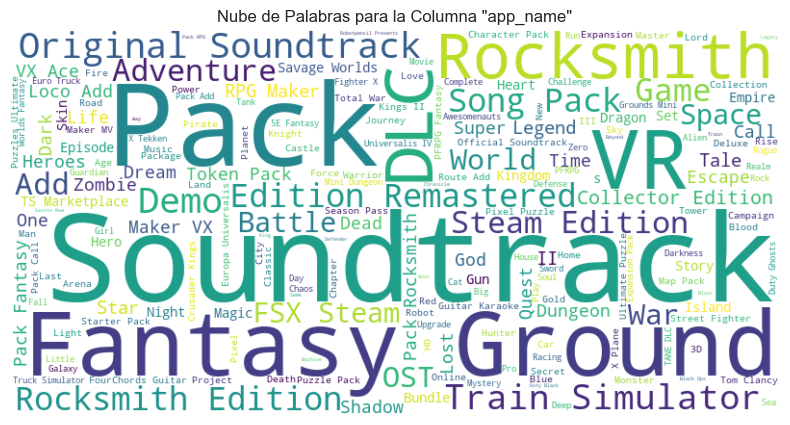

In [118]:
# Crear un string concatenando todos los valores de la columna 'app_name'
app_names_text = ' '.join(steam_games['app_name'].dropna())

# Configurar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(app_names_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "app_name"')
plt.show()

Entre las palabras más recurrentes en los títulos se encuentran: **soundtrack**, **fantasy ground**, **Rocksmith**, **Pack**, **DLC** y **VR**.

Estas palabras indican posibles características o elementos distintivos de los videojuegos, como la presencia de bandas sonoras, funcionalidades de realidad virtual (VR), paquetes de contenido descargable (DLC).

## Análisis Exploratorio del CSV "user_items"

### Lectura del CSV

Importamos el conjunto de datos "user_items" en el entorno de trabajo.

In [119]:
user_items =pd.read_csv('..\\Datsets\\CSV\\user_items.csv')

### Estructura del CSV

Para comprender la estructura del DataFrame "user_items", exploramos la cantidad de filas, columnas y la presencia de datos nulos.

In [120]:
print(f'El dataframe de user_items tiene {user_items.shape[0]} filas')
print(f'El dataframe de user_items tiene {user_items.shape[1]} columnas')

El dataframe de user_items tiene 5094105 filas
El dataframe de user_items tiene 5 columnas


Porcentaje de datos nulos por columna

In [121]:
porcentaje_nulos = round(user_items.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

user_id             0.0%
items_count         0.0%
item_id             0.0%
item_name           0.0%
playtime_forever    0.0%
dtype: object


El dataframe no contiene valores nulos

Datos duplicados

In [137]:
# Verificar la cantidad de datos duplicados
duplicados = user_items.duplicated().sum()
print(f"Cantidad de datos duplicados en user_items: {duplicados}")

Cantidad de datos duplicados en user_items: 13


Tipo de datos

In [138]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = user_items.dtypes
print("\nTipos de datos en user_items:")
print(tipos_de_datos)


Tipos de datos en user_items:
user_id             object
items_count          int64
item_id              int64
item_name           object
playtime_forever     int64
dtype: object


In [139]:
user_items.head()

,user_id,items_count,item_id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6
1,76561197970982479,277,20,Team Fortress Classic,0
2,76561197970982479,277,30,Day of Defeat,7
3,76561197970982479,277,40,Deathmatch Classic,0
4,76561197970982479,277,50,Half-Life: Opposing Force,0


### Estadística descriptiva

In [125]:
user_items.drop(columns=['user_id', 'item_id']).describe()

,items_count,playtime_forever
count,5.094105e+06,5.094105e+06
mean,3.157324e+02,9.905511e+02
std,6.969073e+02,5.414297e+03
min,1.000000e+00,0.000000e+00
25%,7.100000e+01,0.000000e+00
50%,1.370000e+02,3.400000e+01
75%,2.750000e+02,3.550000e+02
max,7.762000e+03,6.427730e+05


**items_count:**
  - **mean:** En promedio, los jugadores poseen alrededor de 315.73 juegos.
  - **std:** Desviación estandar de 696.91 juegos.
  - **50%:** 50% de los usuarios tienen menos de 137 juegos.
  - **max:** El usuario con más juegos tiene 7,762.

**playtime_forever:**
  - **mean:** En promedio los usuarios han jugado 990.55 horas por juego.
  - **std:** Desviación estandar es de 5,414.30 horas.
  - **50%:** 50% de los jugadores han jugado menos de 34 horas cada juego.
  - **max:** El tiempo maximo jugado el mismo juego es de 642,773 horas.

### Histograma de item_count

En este gráfico se presenta un histograma que ilustra la distribución de la cantidad de juegos por usuario en el conjunto de datos. Se aplicó una transformación logarítmica para reducir el rango, ya que se observaron valores extremadamente grandes y la ausencia de valores negativos. La segunda fila del gráfico muestra la distribución de los valores después de aplicar esta transformación.

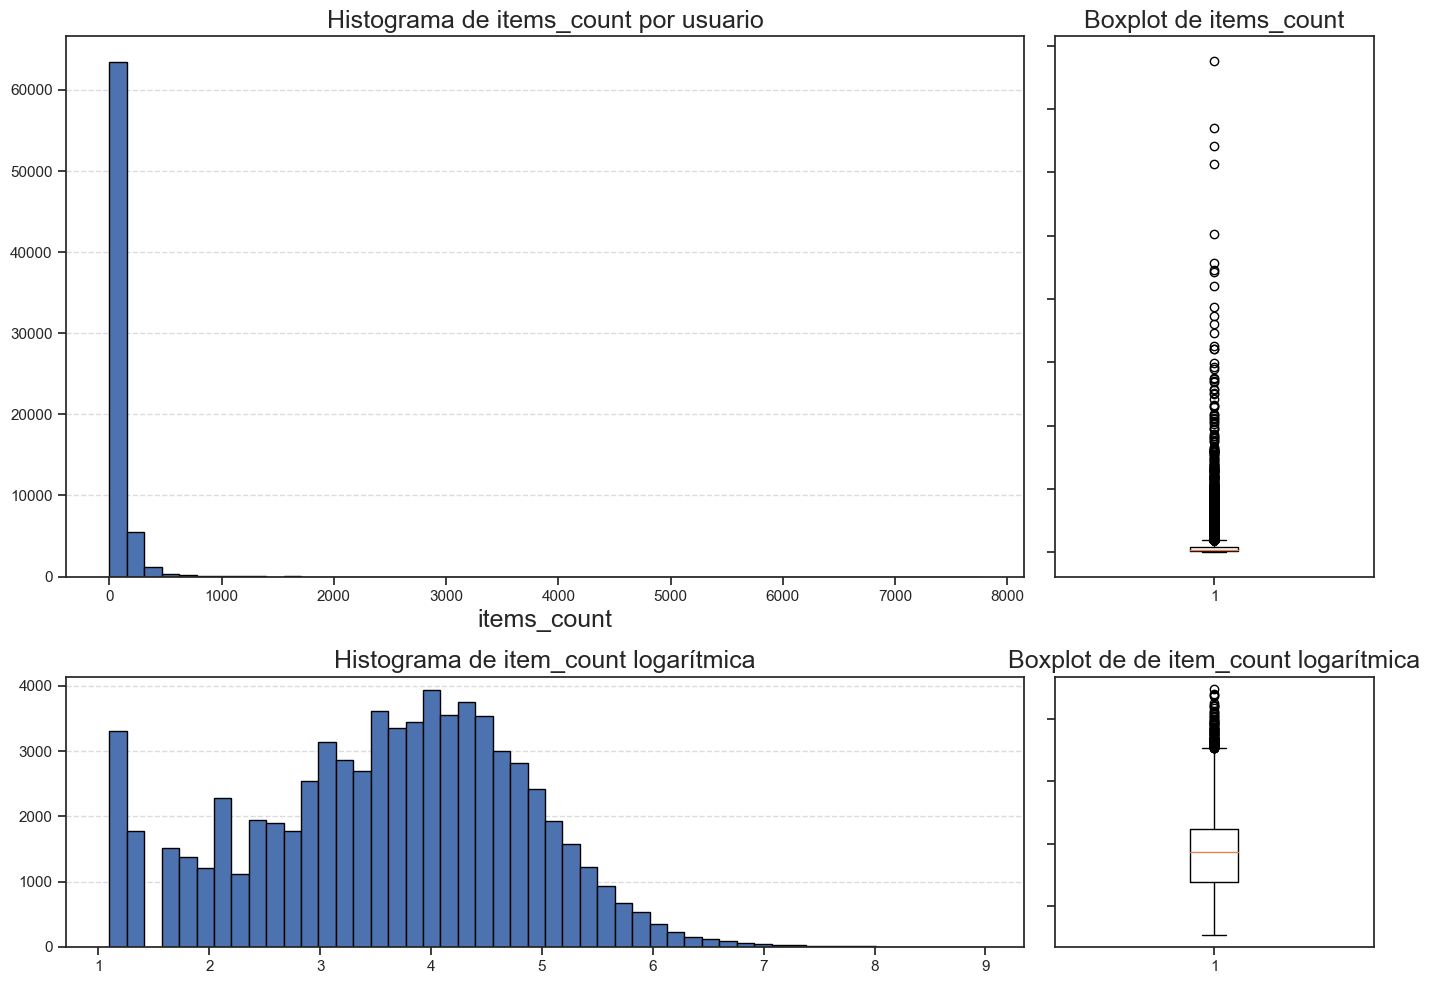

In [141]:
# Tomar el primer valor de items_count para cada usuario porque se repiten.
df_primer_valor_items = user_items.groupby('user_id')['items_count'].first().reset_index()

# Aplicar transformación logarítmica , sumamos 1 por los valores que son 0
df_primer_valor_items['log_items_count'] = np.log1p(df_primer_valor_items['items_count'] + 1)

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [2, 1]})

# Histograma de items_count por usuario 
axes[0, 0].hist(df_primer_valor_items['items_count'], bins=50, edgecolor='black')
axes[0, 0].set_title('Histograma de items_count por usuario', fontsize=18)
axes[0, 0].set_xlabel('items_count', fontsize=18)
axes[0, 0].set_ylabel('')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de items_count
axes[0, 1].boxplot(df_primer_valor_items['items_count'], vert=True)
axes[0, 1].set_title('Boxplot de items_count', fontsize=18)
axes[0, 1].set_yticklabels([])
axes[0, 1].set_xlabel('')

# Histograma de datos después de la transformación logarítmica
axes[1, 0].hist(df_primer_valor_items['log_items_count'], bins=50, edgecolor='black')
axes[1, 0].set_title('Histograma de item_count logarítmica', fontsize=18)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de log_items_count (transformación logarítmica)
axes[1, 1].boxplot(df_primer_valor_items['log_items_count'], vert=True)
axes[1, 1].set_title('Boxplot de de item_count logarítmica', fontsize=18)
axes[1, 1].set_yticklabels([])
axes[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()


### Histograma de playtime_forever

Cuando se observa el histograma de playtime_forever, se identifican valores extremos muy grandes, para abordar esta situación, se decide aplicar una transformación logarítmica a los datos.

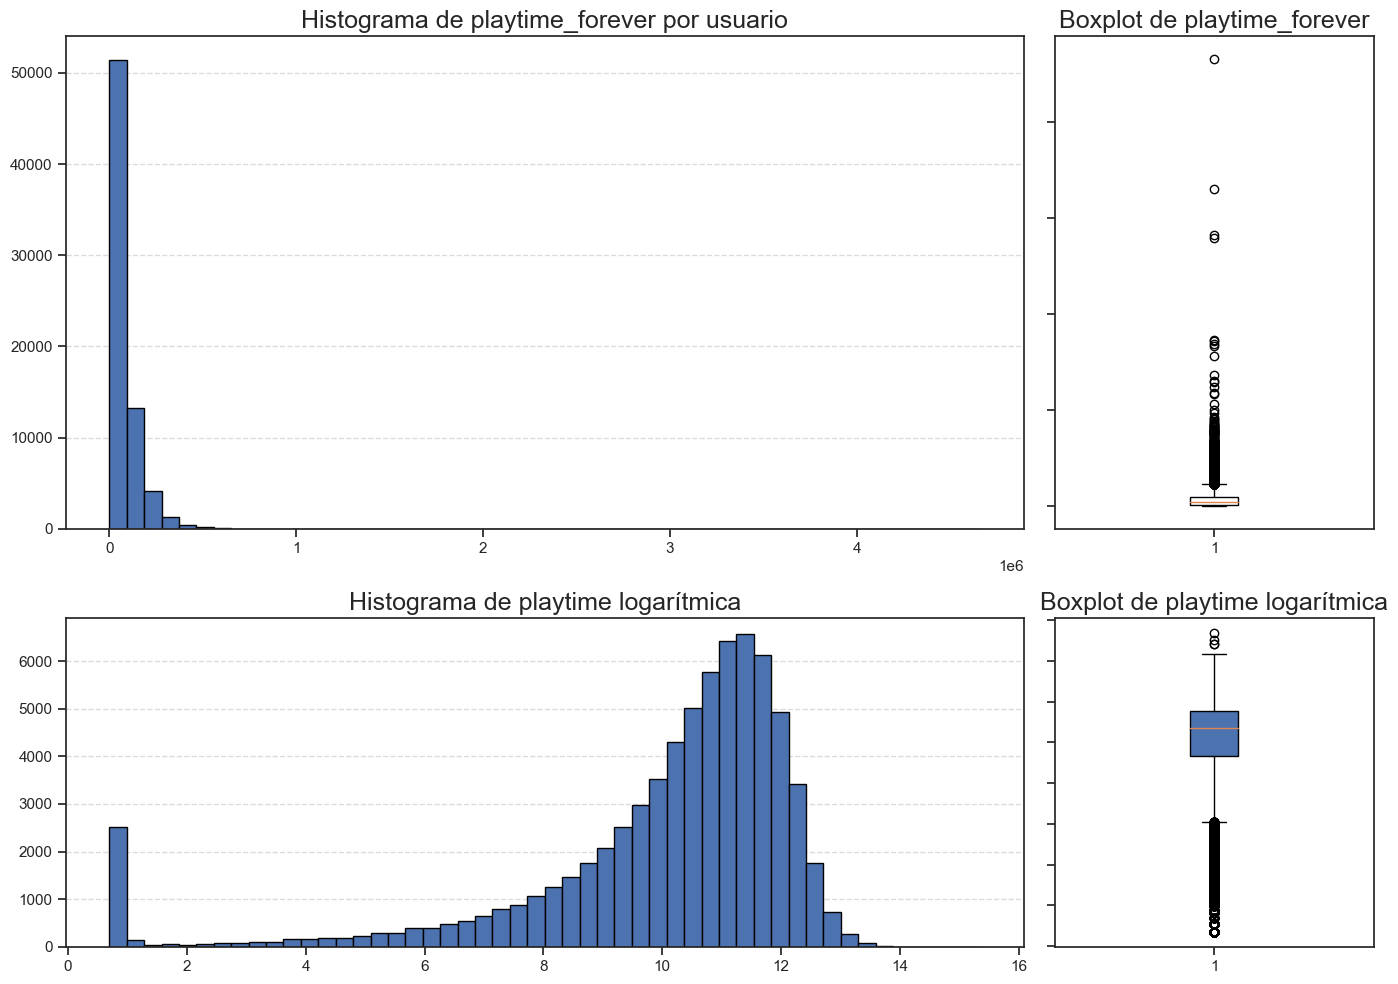

In [153]:
# Agregar la columna de suma de playtime_forever por usuario
df_agg = user_items.groupby('user_id')['playtime_forever'].sum().reset_index()

# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1.5, 1]})

# Histograma de datos originales
axs[0, 0].hist(df_agg['playtime_forever'], bins=50, edgecolor='black')
axs[0, 0].set_title('Histograma de playtime_forever por usuario',fontsize =18)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de datos originales
axs[0, 1].boxplot(df_agg['playtime_forever'], vert=True)
axs[0, 1].set_title('Boxplot de playtime_forever',fontsize =18)
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlabel('')

# Aplicar la transformación logarítmica a la columna playtime_forever
df_agg['playtime_log'] = np.log1p(df_agg['playtime_forever']+1)

# Histograma de datos transformados
axs[1, 0].hist(df_agg['playtime_log'], bins=50, edgecolor='black')
axs[1, 0].set_title('Histograma de playtime logarítmica',fontsize =18)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de datos transformados
axs[1, 1].boxplot(df_agg['playtime_log'], vert=True, patch_artist=True, boxprops=dict())
axs[1, 1].set_title('Boxplot de playtime logarítmica',fontsize =18)
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()

Después de aplicar la transformación logarítmica, se nota que la distribución resultante está sesgada hacia la izquierda. Al examinar el boxplot de los datos transformados, se observa que hay más valores atípicos hacia la parte inferior que hacia la parte superior.

### Nube de Palabras

Se va a realizar la nube de palabras de la columna `item_name` para conocer las palabras más populares que aparecen en los títulos de los juegos.


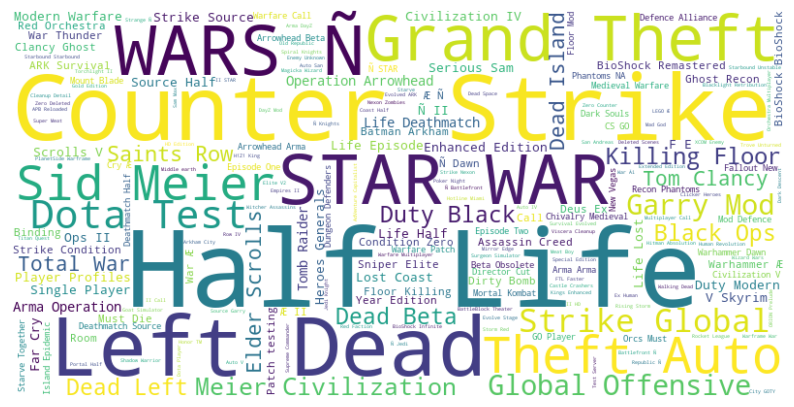

In [129]:
# Concatenar todos los nombres de los elementos en una sola cadena
text = ' '.join(user_items['item_name'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Mostrar la nube de palabras usando Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Entre los nombres de los juegos que se repiten con más frecuencia se encuentran: "Half Life", "Theft Auto", "Star War" y "Counter Strike".

# Análisis Exploratorio del CSV user_reviews

### Lectura del CSV

Importamos el conjunto de datos "user_reviews" en el entorno de trabajo.

In [154]:
user_reviews = pd.read_csv('..\\Datsets\\CSV\\user_reviews.csv')

### Estructura del CSV

Para comprender la estructura del DataFrame "user_reviews", exploramos la cantidad de filas, columnas y la presencia de datos nulos.

In [155]:
print(f'El dataframe de user_reviews tiene {user_reviews.shape[0]} filas')
print(f'El dataframe de user_reviews tiene {user_reviews.shape[1]} columnas')

El dataframe de user_reviews tiene 58431 filas
El dataframe de user_reviews tiene 6 columnas


Porcentaje de datos nulos por columna

In [156]:
porcentaje_nulos = round(user_reviews.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

user_id                0.0%
item_id                0.0%
recommend              0.0%
posted_year           17.0%
sentiment_score        0.0%
sentiment_analysis     0.0%
dtype: object


Se observó la presencia de valores nulos en la columna posted_year, mientras que el resto de las columnas del conjunto de datos están completas. La columna de posted_year nos indica el año en el que el usuario dejó su reseña del juego.

Datos duplicados

In [157]:
# Verificar la cantidad de datos duplicados
duplicados = user_reviews.duplicated().sum()
print(f"Cantidad de datos duplicados en user_reviews: {duplicados}")

Cantidad de datos duplicados en user_reviews: 0


Tipo de datos

In [158]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = user_items.dtypes
print("\nTipos de datos en user_items:")
print(tipos_de_datos)


Tipos de datos en user_items:
user_id             object
items_count          int64
item_id              int64
item_name           object
playtime_forever     int64
dtype: object


### Estadística descriptiva

In [134]:
user_reviews.drop(columns=['item_id','sentiment_score'],axis=1).describe()

,posted_year,sentiment_analysis
count,48498.000000,58431.000000
mean,2014.148150,1.468826
std,0.842611,0.757426
min,2010.000000,0.000000
25%,2014.000000,1.000000
50%,2014.000000,2.000000
75%,2015.000000,2.000000
max,2015.000000,2.000000


En relación al año en que los usuarios realizaron las reseñas, la mitad de ellas fueron hechas antes del 2014. Con con una desviación estándar de 0.84, lo que indica una baja variabilidad en el año de las revisiones.

En cuanto al análisis de sentimiento, donde la escala va de 0 a 2, el promedio es de 1.46. Esto sugiere que la mayoría de los comentarios fueron catalogados como positivos. Además, el 50% de los datos tienen una calificación de 2 o menos.


In [159]:
user_reviews.head()

,user_id,item_id,recommend,posted_year,sentiment_score,sentiment_analysis
0,76561197970982479,1250,True,2011.0,0.8481,2
1,76561197970982479,22200,True,2011.0,0.2263,2
2,76561197970982479,43110,True,2011.0,0.9117,2
3,js41637,251610,True,2014.0,0.9566,2
4,js41637,227300,True,2013.0,0.9708,2


### Gráfica de Barras

En el gráfico de barras, se presenta una división según las categorías de si recomendaron el juego o no, y si dejaron reseñas positivas, desglosadas por año.


Text(0.5, 1.0, 'Análisis de Sentimientos por Año')

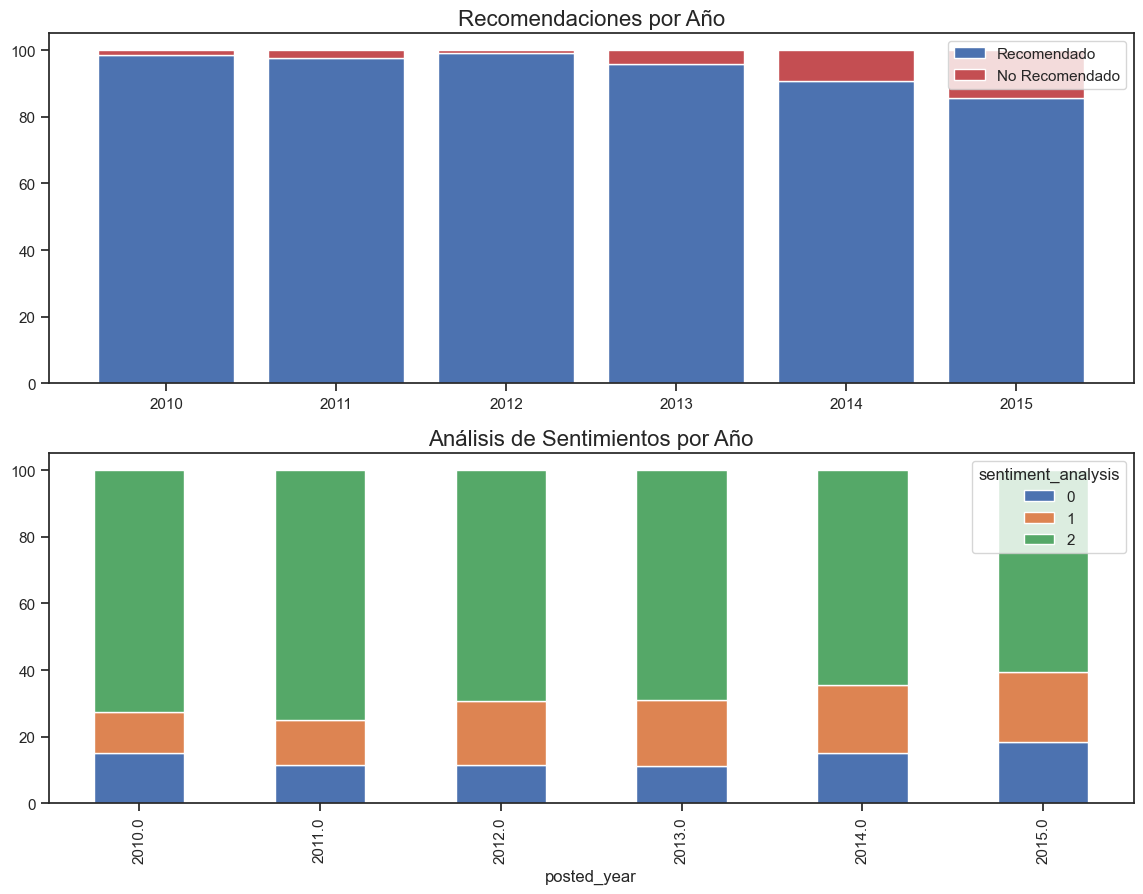

In [164]:
# Calcular los totales por año
total = user_reviews.groupby('posted_year').size().reset_index(name='total')

# Calcular la cantidad de recomendaciones True y False por año
recomendaciones_verdaderas = user_reviews[user_reviews['recommend'] == True].groupby('posted_year').size().reset_index(name='recomendaciones_verdaderas')
recomendaciones_falsas = user_reviews[user_reviews['recommend'] == False].groupby('posted_year').size().reset_index(name='recomendaciones_falsas')

# Unir los DataFrames
df_recomendaciones = total.merge(recomendaciones_verdaderas, on='posted_year').merge(recomendaciones_falsas, on='posted_year')

# Calcular los porcentajes
df_recomendaciones['recomendaciones_verdaderas_pct'] = df_recomendaciones['recomendaciones_verdaderas'] / df_recomendaciones['total'] * 100
df_recomendaciones['recomendaciones_falsas_pct'] = df_recomendaciones['recomendaciones_falsas'] / df_recomendaciones['total'] * 100

# Calcular la cantidad de cada tipo de análisis de sentimientos por año
recuento_sentimientos = user_reviews.groupby(['posted_year', 'sentiment_analysis']).size().unstack(fill_value=0)

# Calcular los porcentajes
df_sentimientos = recuento_sentimientos.div(recuento_sentimientos.sum(axis=1), axis=0) * 100

fig, axs = plt.subplots(2, 1, figsize=(14, 10))  

# Crear las barras para las recomendaciones True y False
barras_recomendaciones_verdaderas = axs[0].bar(df_recomendaciones['posted_year'], df_recomendaciones['recomendaciones_verdaderas_pct'], color='b', label='Recomendado')
barras_recomendaciones_falsas = axs[0].bar(df_recomendaciones['posted_year'], df_recomendaciones['recomendaciones_falsas_pct'], bottom=df_recomendaciones['recomendaciones_verdaderas_pct'], color='r', label='No Recomendado')
axs[0].set_title('Recomendaciones por Año',fontsize = 16)
axs[0].legend()

# Crear las barras para cada tipo de análisis de sentimientos y cambiar las etiquetas del eje y
barras_sentimientos = df_sentimientos.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Análisis de Sentimientos por Año',fontsize = 16)



Notamos que la tendencia de existir más comentarios positivos en comparación con los neutrales y negativos se mantiene a lo largo del tiempo.
